In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/uniwork


/content/drive/MyDrive/uniwork


In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
df.drop(df.columns[[0, 7, 16, 17, 18, 19, 24, 25]], axis = 1, inplace = True)

In [5]:
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,624.0,NaN,NaN,NaN,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,624.0,NaN,NaN,NaN,34.0459,-118.2545
2,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,845.0,NaN,NaN,NaN,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",745.0,998.0,NaN,NaN,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,740.0,NaN,NaN,NaN,34.2198,-118.4468


In [6]:
df['DATE OCC'] = df['DATE OCC'].str.extract(r'(\d{2}/\d{2}/\d{4})')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y')
df['Day'] = df['DATE OCC'].dt.day_name()
df['Month'] = df['DATE OCC'].dt.month_name()
df['Year'] = df['DATE OCC'].dt.year

from datetime import time


def convert_to_time(value):
    hours = value // 100
    minutes = value % 100
    return time(hours, minutes)


df['TIME OCC'] = df['TIME OCC'].apply(convert_to_time)

df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df = df[['Day',
       'Month', 'Year', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc',
       'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON']]

df = df[df['Year'] > 2022]

In [7]:
values1 = {'Crm Cd 2': 0, 'Crm Cd 3': 0, 'Crm Cd 4': 0}
clean_df = df.fillna(value = values1)
clean_df.head(10)

clean_df.dropna(subset = ['Crm Cd 1', 'Mocodes'], inplace = True)
clean_df

values2 = {'Vict Sex': 'X', 'Vict Descent': 'X'}
clean_df2 = clean_df.fillna(value = values2)
clean_df2.replace(['H'], 'X', inplace = True)
clean_df2

clean_df2.dropna(subset = ['Premis Cd', 'Premis Desc'], inplace = True)
clean_df2

,Day,Month,Year,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
337691,Thursday,June,2023,10:50:00,15,N Hollywood,1549,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344,...,M,O,202.0,LIQUOR STORE,442.0,0.0,0.0,0.0,34.1722,-118.3750
408864,Saturday,June,2023,21:50:00,20,Olympic,2022,946,OTHER MISCELLANEOUS CRIME,1202 2004 1300,...,X,X,101.0,STREET,946.0,0.0,0.0,0.0,34.0671,-118.3128
409228,Tuesday,April,2023,07:30:00,7,Wilshire,763,310,BURGLARY,0344 0329,...,F,B,120.0,STORAGE SHED,310.0,0.0,0.0,0.0,34.0472,-118.3656
409479,Saturday,April,2023,12:02:00,10,West Valley,1063,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344,...,X,X,402.0,MARKET,442.0,0.0,0.0,0.0,34.1707,-118.5407
409758,Friday,August,2023,14:25:00,21,Topanga,2185,624,BATTERY - SIMPLE ASSAULT,1202 0417 0361 0603,...,M,W,501.0,SINGLE FAMILY DWELLING,624.0,0.0,0.0,0.0,34.1523,-118.6108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788762,Thursday,January,2023,18:00:00,16,Foothill,1663,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,...,M,X,122.0,"VEHICLE, PASSENGER/TRUCK",740.0,0.0,0.0,0.0,34.2466,-118.4054
788763,Wednesday,March,2023,10:00:00,16,Foothill,1602,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,...,F,X,102.0,SIDEWALK,230.0,0.0,0.0,0.0,34.2790,-118.4116
788764,Wednesday,April,2023,16:30:00,12,77th Street,1239,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,...,M,B,222.0,LAUNDROMAT,230.0,0.0,0.0,0.0,33.9841,-118.2915
788765,Saturday,July,2023,00:01:00,1,Central,154,352,PICKPOCKET,1822 0344,...,F,X,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),352.0,0.0,0.0,0.0,34.0467,-118.2485


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

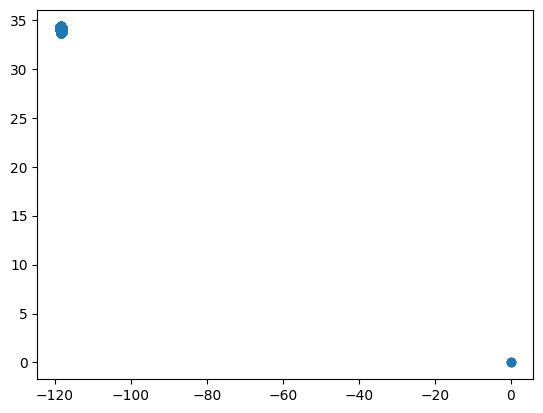

In [15]:
lat_long = clean_df2[['LAT', 'LON']]
lat = clean_df2['LAT']
longg = clean_df2['LON']

plt.scatter(longg, lat)

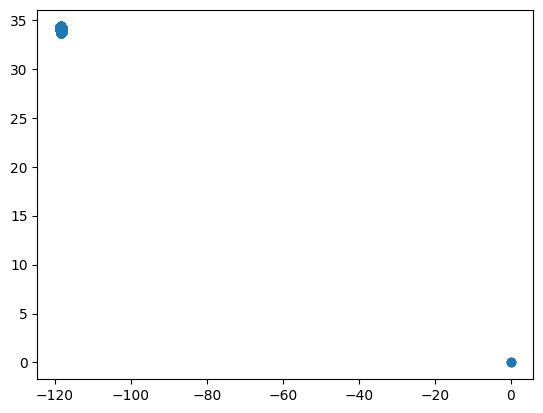

In [16]:
lat_long = clean_df2[['LAT', 'LON']]
lat, longg = clean_df2.LAT, clean_df2.LON

plt.scatter(longg, lat)

In [17]:
pip install folium

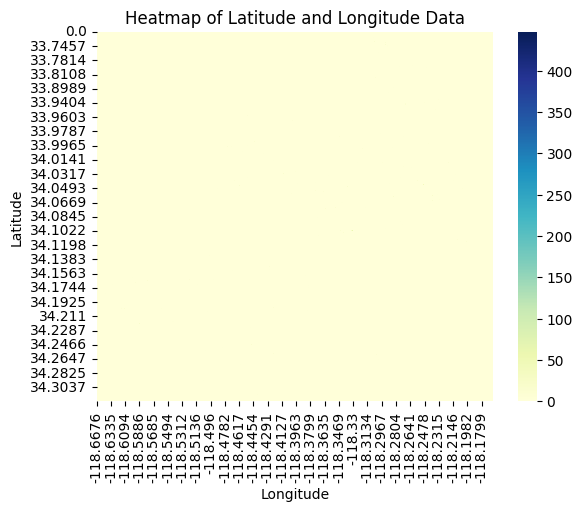

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
latitudes = clean_df2['LAT']  #latitude range
longitudes = clean_df2['LON']  #longitude range

# Create a DataFrame with latitude and longitude
data = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

# Create a 2D heatmap
heatmap_data = pd.pivot_table(data, values=None, index='Latitude', columns='Longitude', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of Latitude and Longitude Data")

# Show the heatmap
plt.show()


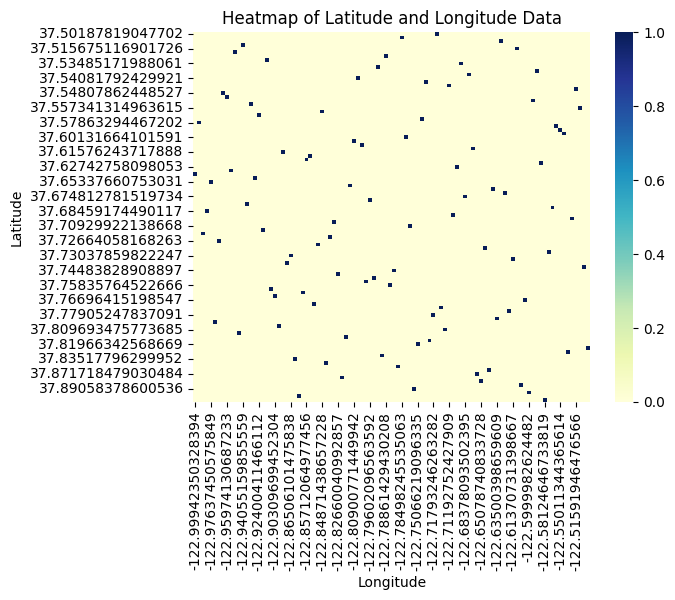

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random latitude and longitude data (replace with your own data)
np.random.seed(0)
latitudes = np.random.uniform(37.5, 37.9, 100)  # Example latitude range for San Francisco
longitudes = np.random.uniform(-122.5, -123.0, 100)  # Example longitude range for San Francisco

# Create a DataFrame with latitude and longitude
data = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

# Create a 2D heatmap
heatmap_data = pd.pivot_table(data, values=None, index='Latitude', columns='Longitude', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of Latitude and Longitude Data")

# Show the heatmap
plt.show()


In [30]:
df = pd.read_csv('Lat_Long.csv')

In [31]:
df.head()

,longitude,latitude
0,-118.2978,34.0141
1,-118.2545,34.0459
2,-118.2474,34.0448
3,-118.4019,34.1685
4,-118.4468,34.2198


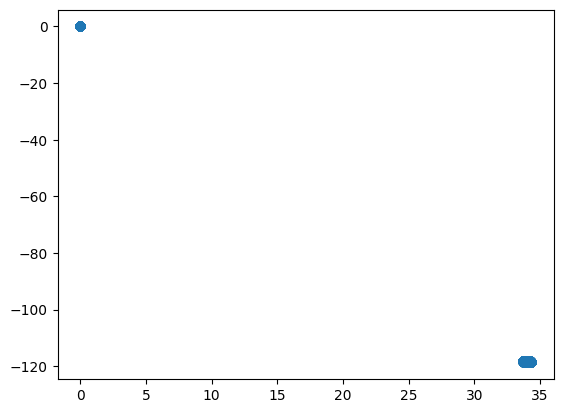

In [33]:
lat_long = df[['latitude', 'longitude']]
lat, longg = df.latitude, df.longitude

plt.scatter(lat, longg)

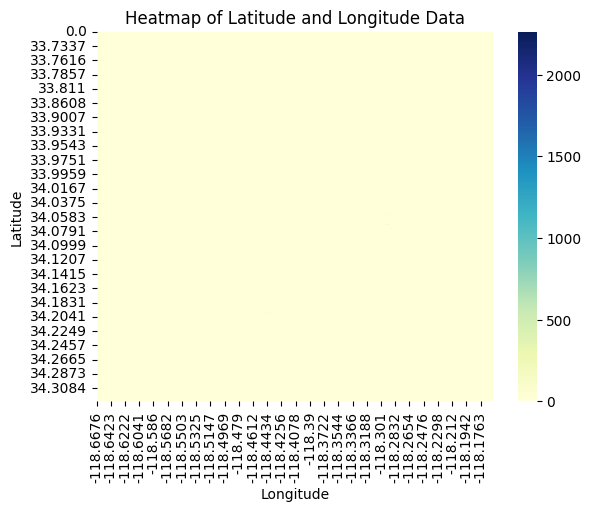

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
latitudes = lat #latitude range
longitudes = longg  #longitude range

# Create a DataFrame with latitude and longitude
data = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

# Create a 2D heatmap
heatmap_data = pd.pivot_table(data, values=None, index='Latitude', columns='Longitude', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of Latitude and Longitude Data")

# Show the heatmap
plt.show()
